# Reads in all the .jpg images from a folder into a collection #

In [7]:
from skimage.io import imread_collection
import matplotlib.pyplot as plt
import numpy as np
 
path = 'C:/Users/sam2146/Documents/522_Proj/Images/*.jpg'
images = imread_collection(path)

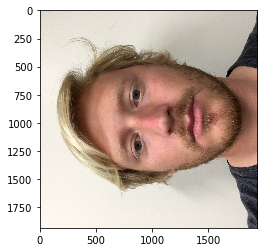

In [7]:
plt.imshow(images[0])

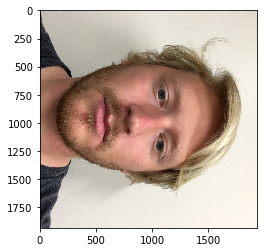

In [8]:
flipped=np.fliplr(images[0])
plt.imshow(flipped)

In [2]:
len(images)

56

Shape for original images

In [3]:
images[1].shape

(1932, 1932, 3)

In [4]:
nsamples, nx, ny = images[1].shape
d2_train_dataset = images[1].reshape((nsamples,nx*ny))

Ran a PCA to compress big images

In [8]:
from sklearn.decomposition import PCA

X_train=d2_train_dataset

pca=PCA()
pca.fit(X_train)
csum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(csum>=.9999)+1
pca=PCA(n_components=d)
X_train_reduced=pca.fit_transform(X_train)
X_train.shape, X_train_reduced.shape

((1932, 5796), (1932, 746))

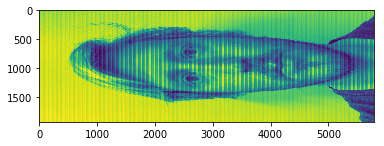

In [16]:
plt.imshow(d2_train_dataset)

In [2]:
import numpy as np

test=images[1]
n,m,y=test.shape
x1=np.ones((n,1,3))
test1=np.concatenate((test,x1),axis=1)

In [27]:
test1.shape

(1932, 1933, 3)

In [34]:
ones=test1[:,-1:]
for x in range(len(ones)):
    ones[x]=[1,0,0]

In [38]:
ones[1931]

array([[1., 0., 0.]])

In [50]:
images[1].shape

(1932, 1932, 3)

# Adding a column of [1,0,0] to one hot encode images

In [4]:
labeled_images=[]
for x in range(len(images)):
    img=images[x]
    n,m,y=img.shape
    x1=np.ones((n,1,3))
    img1=np.concatenate((img,x1),axis=1)
    labeled_images.append(img1)
    

In [73]:
for x in range(len(labeled_images)):
    labeled_images[x][:,-1:]=[1,0,0]

In [7]:
def label_images(path,label):
    images = imread_collection(path)
    labeled_images=[]
    for i in range(len(images)):
        img=images[i]
        n,m,y=img.shape
        x1=np.ones((n,1,3))
        img1=np.concatenate((img,x1),axis=1)
        labeled_images.append(img1)
    for j in range(len(labeled_images)):
        labeled_images[j][:,-1:]=label
    return(labeled_images)

In [5]:
path = 'C:/Users/sam2146/Documents/522_Proj/Images/*.jpg'
label_A=[1,0,0]
label_K=[0,1,0]
label_T=[0,0,1]
labeled_images=label_images(path,label_A)

In [8]:
path = 'C:/Users/sam2146/Documents/522_Proj/small/*.jpg'
label_A=[1,0,0]
label_K=[0,1,0]
label_T=[0,0,1]
labeled_images=label_images(path,label_A)

# Save image arrays to a file

didn't work that well, when loaded again they had a different shape then before, not sure why

In [18]:
np.save('Image_arrays',labeled_images)

In [22]:
labeled_images=np.load('C:/Users/sam2146/Documents/522_Proj/Image_arrays.npy')

In [23]:
labeled_images[40].shape

(320, 321, 3)

In [24]:
np.array_equal(labeled_images[5][:,:-1],images[5])

False

In [25]:
labeled_images[5][:,-1:]

array([[[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0., 0.]],

       [[1., 0.,

In [26]:
labeled_images[5][:,:-1]

array([[[219., 209., 200.],
        [222., 212., 203.],
        [226., 216., 207.],
        ...,
        [212., 205., 195.],
        [213., 206., 196.],
        [213., 206., 196.]],

       [[222., 212., 203.],
        [223., 213., 204.],
        [224., 214., 205.],
        ...,
        [212., 205., 195.],
        [213., 206., 196.],
        [213., 206., 196.]],

       [[223., 213., 204.],
        [223., 213., 204.],
        [225., 215., 206.],
        ...,
        [212., 205., 195.],
        [213., 206., 196.],
        [213., 206., 196.]],

       ...,

       [[255., 248., 243.],
        [255., 248., 243.],
        [255., 248., 243.],
        ...,
        [ 66.,  65.,  73.],
        [ 64.,  62.,  76.],
        [ 53.,  50.,  69.]],

       [[255., 248., 243.],
        [255., 248., 243.],
        [255., 248., 243.],
        ...,
        [ 74.,  73.,  81.],
        [ 72.,  70.,  84.],
        [ 66.,  63.,  82.]],

       [[255., 248., 243.],
        [255., 248., 243.],
        [255., 2

In [81]:
labeled_images[0]

array([[[217., 209., 198.],
        [218., 210., 199.],
        [220., 212., 201.],
        ...,
        [141., 136., 133.],
        [122., 116., 116.],
        [  1.,   0.,   0.]],

       [[221., 213., 202.],
        [222., 214., 203.],
        [222., 214., 203.],
        ...,
        [138., 133., 130.],
        [116., 110., 110.],
        [  1.,   0.,   0.]],

       [[224., 216., 205.],
        [224., 216., 205.],
        [222., 214., 203.],
        ...,
        [125., 119., 119.],
        [114., 110., 109.],
        [  1.,   0.,   0.]],

       ...,

       [[254., 247., 239.],
        [254., 247., 239.],
        [254., 247., 239.],
        ...,
        [116., 118., 130.],
        [107., 109., 121.],
        [  1.,   0.,   0.]],

       [[254., 247., 239.],
        [254., 247., 239.],
        [254., 247., 239.],
        ...,
        [110., 112., 124.],
        [111., 113., 125.],
        [  1.,   0.,   0.]],

       [[254., 247., 239.],
        [254., 247., 239.],
        [254., 2

In [22]:
images[5]

array([[[215, 205, 195],
        [216, 206, 196],
        [218, 208, 198],
        ...,
        [210, 206, 194],
        [210, 206, 194],
        [210, 206, 194]],

       [[215, 205, 195],
        [215, 205, 195],
        [216, 206, 196],
        ...,
        [211, 207, 195],
        [212, 208, 196],
        [211, 207, 195]],

       [[215, 205, 195],
        [215, 205, 195],
        [215, 205, 195],
        ...,
        [211, 207, 195],
        [212, 208, 196],
        [211, 207, 195]],

       ...,

       [[250, 246, 237],
        [252, 248, 239],
        [253, 249, 240],
        ...,
        [ 65,  69,  80],
        [ 68,  72,  83],
        [ 67,  71,  82]],

       [[253, 246, 238],
        [255, 248, 240],
        [255, 249, 241],
        ...,
        [ 51,  55,  66],
        [ 52,  56,  67],
        [ 51,  55,  66]],

       [[254, 247, 239],
        [255, 249, 241],
        [255, 250, 242],
        ...,
        [ 51,  55,  66],
        [ 48,  52,  63],
        [ 47,  51,  62]]

# Function to flatten images

In [100]:
from skimage.io import imread_collection
import matplotlib.pyplot as plt
 
path = 'C:/Users/sam2146/Documents/522_Proj/small/*.jpg'
images = imread_collection(path)

In [101]:
nsamples, nx, ny = images[1].shape
d2_train_dataset = images[1].reshape((nsamples,nx*ny))

In [102]:
from sklearn.decomposition import PCA

X_train=d2_train_dataset

pca=PCA()
pca.fit(X_train)
csum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(csum>=.9999)+1
pca=PCA(n_components=d)
X_train_reduced=pca.fit_transform(X_train)
X_train.shape, X_train_reduced.shape

((320, 960), (320, 173))

In [107]:
import pandas as pd
def flat_images2(images,label):
    flat_images=[]
    for i in range(len(images)):
        img=images[i]
        img1=img.flatten()
        flat_images.append(img1)
    length=flat_images[1].shape
    df=pd.DataFrame(flat_images)
    df['label']=label
    return(df)

In [109]:
pca_df=flat_images2(X_train_reduced,1)

In [110]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,label
0,1376.316774,-510.244860,348.942805,153.724979,-4.121758,482.791945,77.170973,175.467828,-53.273637,-105.393494,...,-3.583265,1.358344,-1.025388,2.482870,-3.086592,-1.389268,-1.367512,0.737249,3.679801,1
1,1383.036311,-513.706595,343.514781,152.486530,-7.435291,480.359630,73.566584,169.614531,-52.116163,-108.343012,...,-1.340590,-0.229086,0.760686,0.178864,-2.906842,-1.732547,-0.764731,1.688715,3.054677,1
2,1395.761446,-512.313791,340.242326,148.654983,-7.035811,473.871041,72.001170,164.112280,-44.854413,-111.938994,...,-0.386599,-0.734149,2.269166,-1.340482,0.773183,-2.012769,0.253408,1.016713,0.715660,1
3,1407.981094,-506.328221,337.768021,149.445127,-7.820770,471.974607,70.277928,163.193909,-34.031172,-118.887129,...,0.302662,1.714628,0.813296,-3.563550,3.337115,-2.266111,0.916269,-0.912084,0.399193,1
4,1411.838189,-503.457548,339.523166,152.223291,-10.155840,470.482033,66.980502,158.474182,-29.425124,-121.371219,...,0.229664,3.465643,-1.486681,-3.101597,3.335911,-0.837921,0.875703,-0.792950,-1.874996,1


In [1]:
import pandas as pd
def flat_images(path,label):
    images=imread_collection(path)
    flat_images=[]
    for i in range(len(images)):
        img=images[i]
        img1=img.flatten()
        flat_images.append(img1)
    length=flat_images[1].shape
    df=pd.DataFrame(flat_images)
    df['label']=label
    return(df)

In [3]:
path = 'C:/Users/sam2146/Documents/522_Proj/small/*.jpg'
label=[1,2,3]
df=flat_images(path,label[0])

In [8]:
position=[np.floor(i/7) for i in df.index]
df['position']=position

In [12]:
df.position

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    2.0
15    2.0
16    2.0
17    2.0
18    2.0
19    2.0
20    2.0
21    3.0
22    3.0
23    3.0
24    3.0
25    3.0
26    3.0
27    3.0
28    4.0
29    4.0
30    4.0
31    4.0
32    4.0
33    4.0
34    4.0
35    5.0
36    5.0
37    5.0
38    5.0
39    5.0
40    5.0
41    5.0
42    6.0
43    6.0
44    6.0
45    6.0
46    6.0
47    6.0
48    6.0
49    7.0
50    7.0
51    7.0
52    7.0
53    7.0
54    7.0
55    7.0
Name: position, dtype: float64

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,307192,307193,307194,307195,307196,307197,307198,307199,label,position
0,255,254,255,255,254,255,255,254,255,255,...,207,201,213,208,202,213,208,202,1,0.0
1,223,213,204,225,215,206,225,215,206,224,...,82,94,90,90,100,92,92,102,1,0.0
2,223,213,204,222,212,203,221,211,202,222,...,65,77,63,65,77,63,65,77,1,0.0
3,223,213,204,223,213,204,224,214,205,225,...,66,77,60,58,71,60,58,72,1,0.0
4,218,208,198,222,212,202,223,213,203,223,...,71,86,75,74,92,73,72,90,1,0.0


In [5]:
path = 'C:/Users/sam2146/Documents/522_Proj/Tyler/*.jpg'
label=[1,2,3]
df_t=flat_images(path,label[1])

In [6]:
df_t.head()

,0,1,2,3,4,5,6,7,8,9,...,307191,307192,307193,307194,307195,307196,307197,307198,307199,label
0,246,241,235,248,243,237,250,245,239,250,...,223,215,212,223,215,212,225,217,214,2
1,255,253,246,255,253,246,255,253,246,255,...,226,215,211,223,212,208,223,212,208,2
2,243,233,231,243,233,231,243,233,231,244,...,218,209,204,218,209,204,218,209,204,2
3,243,233,231,244,234,232,244,234,232,244,...,221,212,207,222,213,208,222,213,208,2
4,248,238,229,249,239,230,250,240,231,249,...,225,215,206,226,216,207,229,219,210,2


In [13]:
position=[np.floor(i/7) for i in df_t.index]
df_t['position']=position

In [17]:
big_df=pd.concat([df,df_t])
big_df.head(25)

,0,1,2,3,4,5,6,7,8,9,...,307192,307193,307194,307195,307196,307197,307198,307199,label,position
0,255,254,255,255,254,255,255,254,255,255,...,207,201,213,208,202,213,208,202,1,0.0
1,223,213,204,225,215,206,225,215,206,224,...,82,94,90,90,100,92,92,102,1,0.0
2,223,213,204,222,212,203,221,211,202,222,...,65,77,63,65,77,63,65,77,1,0.0
3,223,213,204,223,213,204,224,214,205,225,...,66,77,60,58,71,60,58,72,1,0.0
4,218,208,198,222,212,202,223,213,203,223,...,71,86,75,74,92,73,72,90,1,0.0
5,219,209,200,222,212,203,226,216,207,225,...,71,79,73,71,85,76,73,94,1,0.0
6,219,206,197,223,210,201,222,209,200,220,...,59,74,49,52,69,65,68,87,1,0.0
7,225,216,207,225,216,207,225,216,207,224,...,40,51,37,35,46,38,36,47,1,1.0
8,223,214,209,223,214,209,224,215,210,222,...,228,226,236,228,226,236,228,226,1,1.0
9,221,212,205,221,212,205,223,214,207,223,...,229,226,237,229,226,238,230,227,1,1.0


In [71]:
import pandas as pd
def flat_images(path,label):
    images = imread_collection(path)
    flat_images=[]
    for j in range(len(images)):
        img=images[j]
        img1=img.flatten()
        flat_images.append(img1)
    return(pd.DataFrame(flat_images,columns=list(range(308160))))

In [72]:
path = 'C:/Users/sam2146/Documents/522_Proj/small/*.jpg'
label=[1,2,3]
flattened_images=label_images(path,label[0])

In [73]:
flattened_images=pd.DataFrame(flat_image,columns=list(range(308160)))
flattened_images.head()

,0,1,2,3,4,5,6,7,8,9,...,308150,308151,308152,308153,308154,308155,308156,308157,308158,308159
0,255.0,254.0,255.0,255.0,254.0,255.0,255.0,254.0,255.0,255.0,...,201.0,213.0,208.0,202.0,213.0,208.0,202.0,1.0,0.0,0.0
1,223.0,213.0,204.0,225.0,215.0,206.0,225.0,215.0,206.0,224.0,...,94.0,90.0,90.0,100.0,92.0,92.0,102.0,1.0,0.0,0.0
2,223.0,213.0,204.0,222.0,212.0,203.0,221.0,211.0,202.0,222.0,...,77.0,63.0,65.0,77.0,63.0,65.0,77.0,1.0,0.0,0.0
3,223.0,213.0,204.0,223.0,213.0,204.0,224.0,214.0,205.0,225.0,...,77.0,60.0,58.0,71.0,60.0,58.0,72.0,1.0,0.0,0.0
4,218.0,208.0,198.0,222.0,212.0,202.0,223.0,213.0,203.0,223.0,...,86.0,75.0,74.0,92.0,73.0,72.0,90.0,1.0,0.0,0.0


In [9]:
flat_image=[]
for x in range(len(labeled_images)):
    img=labeled_images[x]
    img1=img.flatten()
    flat_image.append(img1)

In [10]:
len(flat_image[5])

308160

In [35]:
import pandas as pd
df=pd.DataFrame(flat_image,columns=list(range(308160)))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,308150,308151,308152,308153,308154,308155,308156,308157,308158,308159
0,255.0,254.0,255.0,255.0,254.0,255.0,255.0,254.0,255.0,255.0,...,201.0,213.0,208.0,202.0,213.0,208.0,202.0,1.0,0.0,0.0
1,223.0,213.0,204.0,225.0,215.0,206.0,225.0,215.0,206.0,224.0,...,94.0,90.0,90.0,100.0,92.0,92.0,102.0,1.0,0.0,0.0
2,223.0,213.0,204.0,222.0,212.0,203.0,221.0,211.0,202.0,222.0,...,77.0,63.0,65.0,77.0,63.0,65.0,77.0,1.0,0.0,0.0
3,223.0,213.0,204.0,223.0,213.0,204.0,224.0,214.0,205.0,225.0,...,77.0,60.0,58.0,71.0,60.0,58.0,72.0,1.0,0.0,0.0
4,218.0,208.0,198.0,222.0,212.0,202.0,223.0,213.0,203.0,223.0,...,86.0,75.0,74.0,92.0,73.0,72.0,90.0,1.0,0.0,0.0


Added a label to them

In [46]:
df['label']=1

In [47]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,308151,308152,308153,308154,308155,308156,308157,308158,308159,label
0,255.0,254.0,255.0,255.0,254.0,255.0,255.0,254.0,255.0,255.0,...,213.0,208.0,202.0,213.0,208.0,202.0,1.0,0.0,0.0,1
1,223.0,213.0,204.0,225.0,215.0,206.0,225.0,215.0,206.0,224.0,...,90.0,90.0,100.0,92.0,92.0,102.0,1.0,0.0,0.0,1
2,223.0,213.0,204.0,222.0,212.0,203.0,221.0,211.0,202.0,222.0,...,63.0,65.0,77.0,63.0,65.0,77.0,1.0,0.0,0.0,1
3,223.0,213.0,204.0,223.0,213.0,204.0,224.0,214.0,205.0,225.0,...,60.0,58.0,71.0,60.0,58.0,72.0,1.0,0.0,0.0,1
4,218.0,208.0,198.0,222.0,212.0,202.0,223.0,213.0,203.0,223.0,...,75.0,74.0,92.0,73.0,72.0,90.0,1.0,0.0,0.0,1


# Save data frame to a CSV and load it back into notebook

In [48]:
save_csv=df.to_csv(r'C:/Users/sam2146/Documents/522_Proj/small/flat.csv')

In [49]:
flat=pd.read_csv(r'C:/Users/sam2146/Documents/522_Proj/small/flat.csv')
flat.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,308151,308152,308153,308154,308155,308156,308157,308158,308159,label
0,0,255.0,254.0,255.0,255.0,254.0,255.0,255.0,254.0,255.0,...,213.0,208.0,202.0,213.0,208.0,202.0,1.0,0.0,0.0,1
1,1,223.0,213.0,204.0,225.0,215.0,206.0,225.0,215.0,206.0,...,90.0,90.0,100.0,92.0,92.0,102.0,1.0,0.0,0.0,1
2,2,223.0,213.0,204.0,222.0,212.0,203.0,221.0,211.0,202.0,...,63.0,65.0,77.0,63.0,65.0,77.0,1.0,0.0,0.0,1
3,3,223.0,213.0,204.0,223.0,213.0,204.0,224.0,214.0,205.0,...,60.0,58.0,71.0,60.0,58.0,72.0,1.0,0.0,0.0,1
4,4,218.0,208.0,198.0,222.0,212.0,202.0,223.0,213.0,203.0,...,75.0,74.0,92.0,73.0,72.0,90.0,1.0,0.0,0.0,1


In [52]:
df=flat.drop(columns=['308157','308158','308159'],axis=1)
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,308148,308149,308150,308151,308152,308153,308154,308155,308156,label
0,0,255.0,254.0,255.0,255.0,254.0,255.0,255.0,254.0,255.0,...,212.0,207.0,201.0,213.0,208.0,202.0,213.0,208.0,202.0,1
1,1,223.0,213.0,204.0,225.0,215.0,206.0,225.0,215.0,206.0,...,82.0,82.0,94.0,90.0,90.0,100.0,92.0,92.0,102.0,1
2,2,223.0,213.0,204.0,222.0,212.0,203.0,221.0,211.0,202.0,...,63.0,65.0,77.0,63.0,65.0,77.0,63.0,65.0,77.0,1
3,3,223.0,213.0,204.0,223.0,213.0,204.0,224.0,214.0,205.0,...,68.0,66.0,77.0,60.0,58.0,71.0,60.0,58.0,72.0,1
4,4,218.0,208.0,198.0,222.0,212.0,202.0,223.0,213.0,203.0,...,69.0,71.0,86.0,75.0,74.0,92.0,73.0,72.0,90.0,1


In [51]:
import pandas as pd
pd.DataFrame([flat_image[5]],columns=list(range(308160)))

,0,1,2,3,4,5,6,7,8,9,...,308150,308151,308152,308153,308154,308155,308156,308157,308158,308159
0,219.0,209.0,200.0,222.0,212.0,203.0,226.0,216.0,207.0,225.0,...,79.0,73.0,71.0,85.0,76.0,73.0,94.0,1.0,0.0,0.0
